# ECE580 HW1
by Yuxuan Yang(yy340)

This demonstration is conducted on Google Colab.
PDF file is generated by jupyter nbconvert.

## Part I Data Preparation and Exploration

Get access to data file from Github, the data file address is `/content/ECE580/HW1/imports-85.data`

In [2]:
!git clone https://github.com/thirteendian/ECE580.git
!ls

Cloning into 'ECE580'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 3), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (20/20), 1.98 MiB | 2.76 MiB/s, done.
ECE580	sample_data


### (a)

Define the function for data preprocessing and cleaning. It will print out the number of deleted data in each step.

In [301]:
import pandas as pd;
def dataPreprocessing(addr, tarCol, notOfInterestCol,headerOfInterestCol,unknownSym):
  """
  Take the address of data, clean the data by removeing the not_of_interest
  column, and remove the row where target is unknown. This function will print
  the number of data that has been removed in each step
  """
  data = pd.read_csv(addr,header=None);
  print("Read data from address:", addr);
  print("Raw Data Size:", data.shape[0]*data.shape[1],data.shape);
  #Drop data that are not_of_interest
  print("==========START DROPPING DATA OUT OF INTEREST==========")
  data = data.drop(data.columns[not_of_interest],axis=1);
  print("Total Number of data dropped from not-of-interest is:", data.shape[0]*len(not_of_interest));
  print("DataSize after drop:",data.shape[0]*data.shape[1],data.shape);
  #Add header to data
  data.columns=headerOfInterestCol;
  print("==========START DROPPING DATA DETECTED UNKNOWN(?)==========")
  #Delete row contains 'unknownSym' of target
  target_not_known = []
  num_unknown_dropped=0;
  for header in data.columns:
    target_not_known.clear();
    for index, value in data[header].iteritems():
      if(value=='?'):
        target_not_known.append(index);
    if(len(target_not_known)!=0):
      num_unknown_dropped+=len(target_not_known);
      data=data.drop(target_not_known);
      print("Find unknown with header:",header,". Delete row:",target_not_known,". Number of data dropped:", data.shape[1]*len(target_not_known), "(",len(target_not_known),"rows)");
  print("Total Number of data dropped from unknown target:", data.shape[1]*num_unknown_dropped);
  print("==========DONE==========")
  print("Data Size after preprocessing:", data.shape[0]*data.shape[1],data.shape);
  return data;


Now we would like to use the function to clear the data provided. 

In [302]:
not_of_interest = [0,1,2,3,4,5,6,7,8,14,15,17];
header_of_interest = ['wheel-base', 'length', 'width','height','curb-weight',
                      'engine-size','bore','stroke','compression-ratio',
                      'horsepower','peak-rpm','city-mpg','highway-mpg','price'];
data_clear=dataPreprocessing("/content/ECE580/HW1/imports-85.data", 'price', not_of_interest,header_of_interest,'?');

Read data from address: /content/ECE580/HW1/imports-85.data
Raw Data Size: 5330 (205, 26)
==========START DROPPING DATA OUT OF INTEREST==========
Total Number of data dropped from not-of-interest is: 2460
DataSize after drop: 2870 (205, 14)
==========START DROPPING DATA DETECTED UNKNOWN(?)==========
Find unknown with header: bore . Delete row: [55, 56, 57, 58] . Number of data dropped: 56 ( 4 rows)
Find unknown with header: horsepower . Delete row: [130, 131] . Number of data dropped: 28 ( 2 rows)
Find unknown with header: price . Delete row: [9, 44, 45, 129] . Number of data dropped: 56 ( 4 rows)
Total Number of data dropped from unknown target: 140
==========DONE==========
Data Size after preprocessing: 2730 (195, 14)


### (b)

Define function to take matrix of features and vector of target varibles and produces a (features vs. target) scatter plot.

In [303]:
import matplotlib.pyplot as plt

def featureScatterPlot(feature_matrix, target_vector):
  #Check dimision correctioness
  if (len(target_vector)!=feature_matrix.shape[0]):
    raise Exception("Wrong Dimision:", feature_matrix.shape,"and",target_vector.shape);
  num_features = int(feature_matrix.shape[1]);
  #Calculate Plot matrix
  if(num_features/4!=0):
    num_row_of_subplot = int(num_features/4)+1;
  else:
    num_row_of_subplot = int(num_features/4);
  #Subplot
  fig,axes = plt.subplots(num_row_of_subplot,4,figsize=(30,30));
  index_plot = 0;
  for (header, data) in feature_matrix.iteritems():
    axes[int(index_plot/4),index_plot%4].scatter(data,target_vec);
    axes[int(index_plot/4),index_plot%4].set_title(header,fontsize=30);
    index_plot+=1;
  plt.show()

Now We would like to plot the scatter diagram using our plot function. The subplot will be illustrated by 4 of each row.

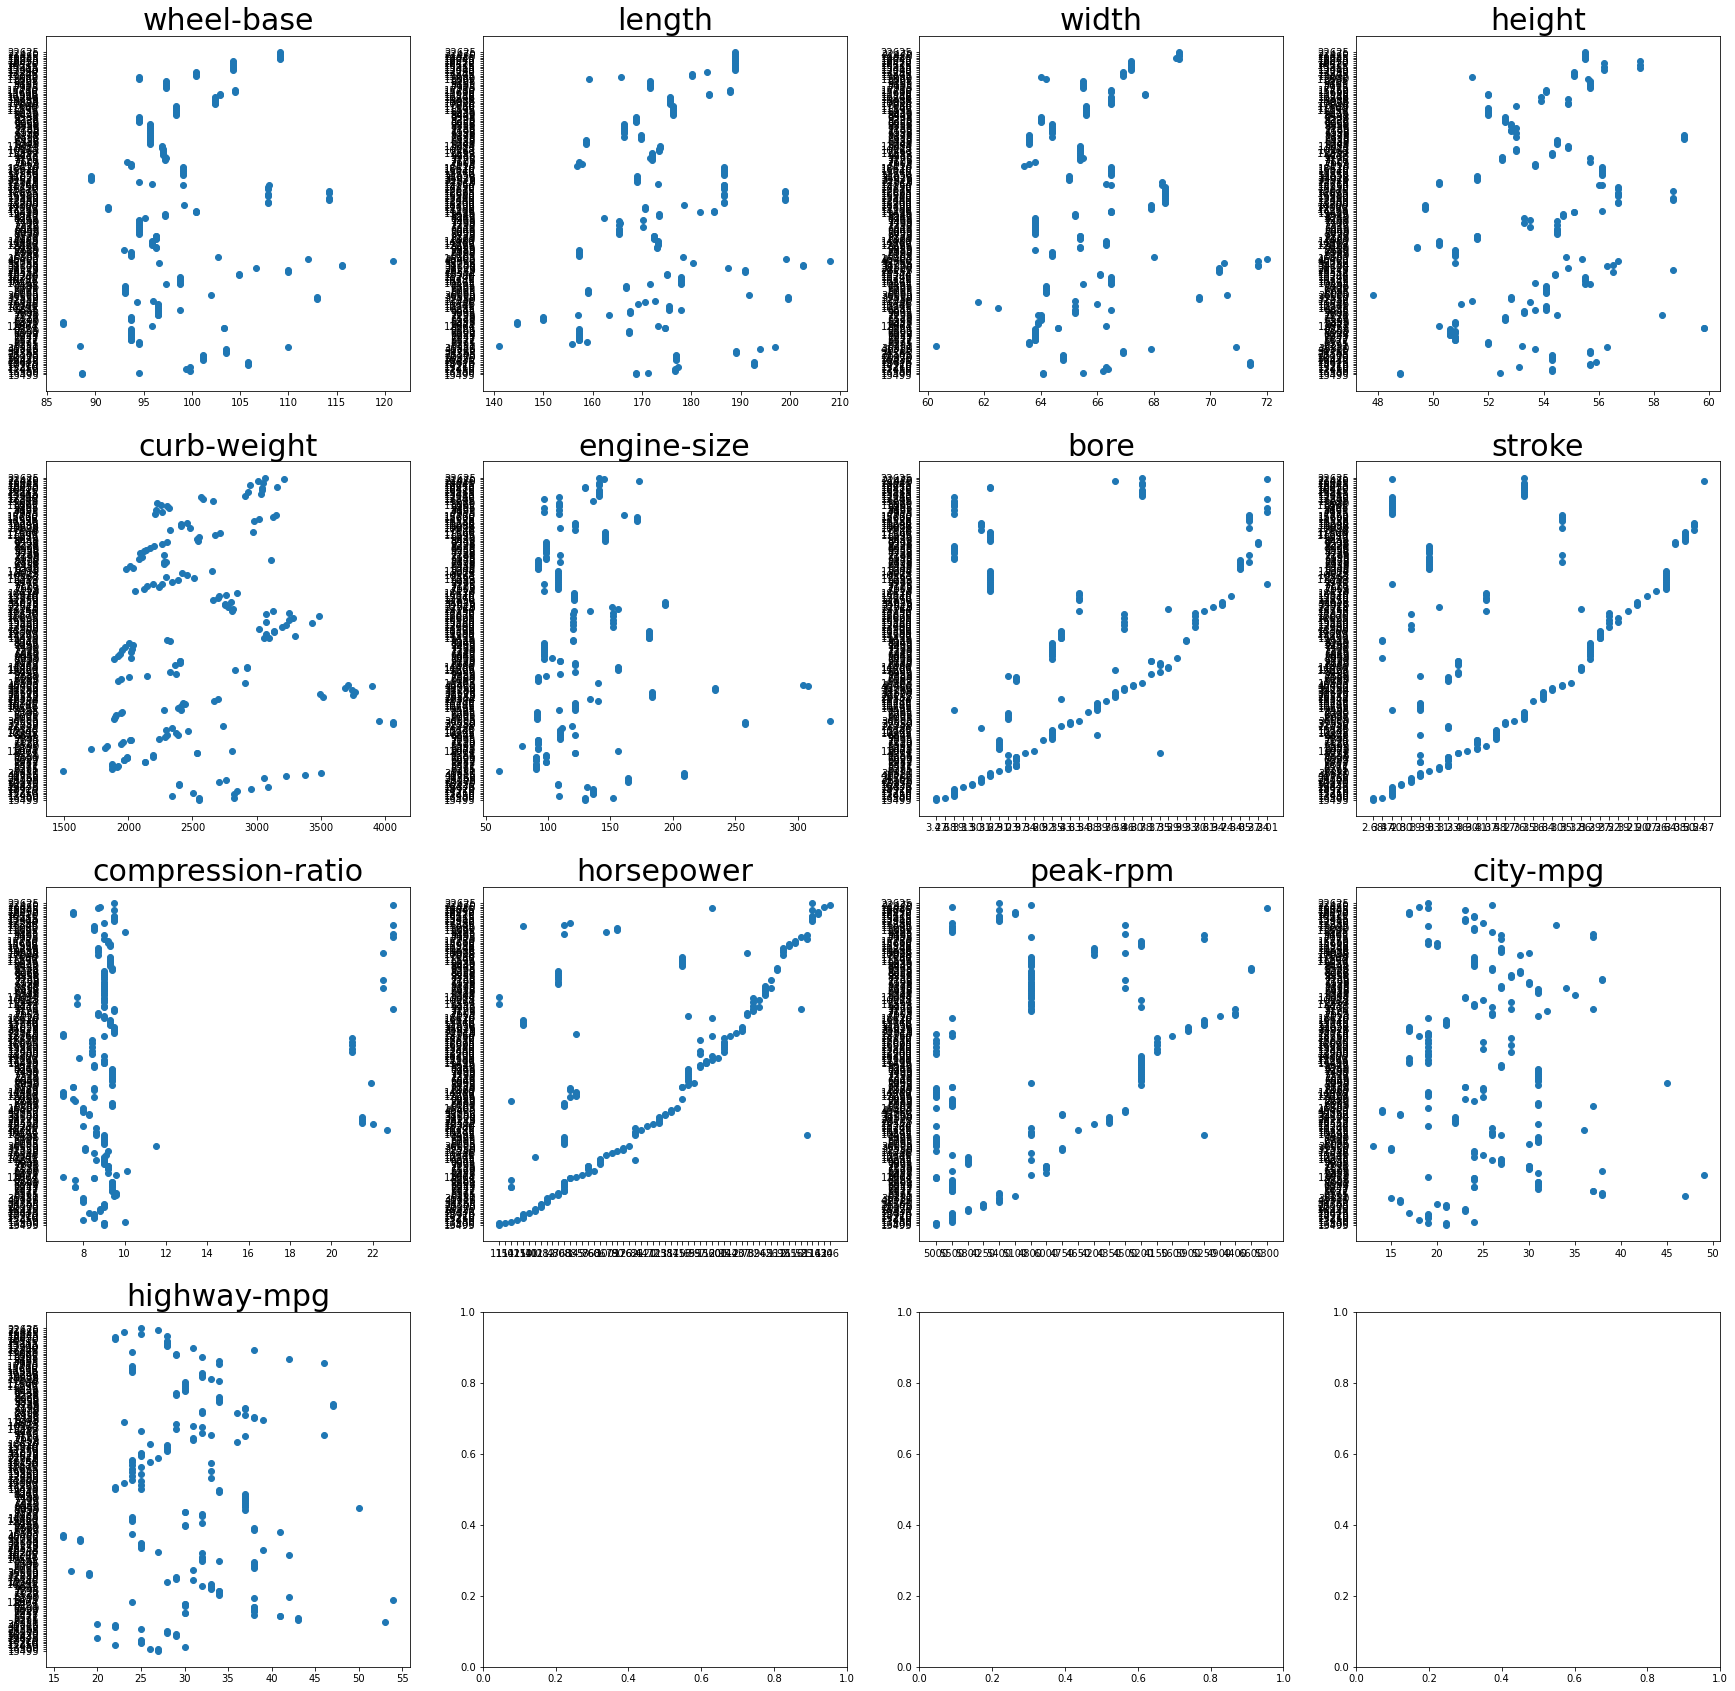

In [304]:
target_vec = data_clear['price'];
featureScatterPlot(data_clear.drop(columns=data_clear.columns[-1],axis=1),target_vec)

### (c)
1. Feature "wheel-base" have weak relationship to target "price". It may have no relationship when price is low, but weak linear relationship when price is high.

2. Feature "length" may does not hold promise for predicting car's price. Because the price at each point distributed vertically among increasing of feature, which does not have strong correlationship. 

3. Feature "width" may hold very weak promise for predicting car's price. Because the price at each point distributed vertically among increasing of feature, which does not have very strong correlationship, but still can find linear relationship when prices are higher. 

4. Feature "height" may does not hold promise for predicting car's price. Because the price at each point distributed randomlly among increasing of feature, which does not have strong correlationship.

5. Feature "curb-weight" may have very weak relationship to car price. Because the dataset distributed horizontally among increasing of feature, and may have linear relationship when curb-weight is small.

6. Feature "engine-size" may hold the promise for predicting price. The distribution of price is nearly a line means there exist any possibilities for price to have relationship of linear model at certain range of engine-size.

7. Feature "bore" may have quadratic or higher order relationship to car price, and it does hold the promise for predicting price. Because most of the distribution of the price point increase in an quadratic or higher order way.

8. Feature "stroke" may have quadratic or higher order relationship to car price, and it does hold the promise for predicting price. Because most of the distribution of the price point increase in an quadratic or higher order way.

9. Feature "compression-ratio" holds the promise for predicting price. It is clear to see the linear relationship between it and the price.

10. Feature "horsepower" hold strong linear promise for predicting price. Because most of the price increase in an linear(or probably quadratic) way with the horsepower.

11. Feature "peak-rpm" may hold linear relationship for predicting price, especially at high peak-rpm position. Because expect few horsepower range, most of the price follows an increasing trend with increasing of peak-rpm.

12. Feature "city-mpg" may does not hold promise for predicting car's price. Because the price at each point distributed randomly among increasing of feature, which does not have strong correlationship. 

13. Feature "highway-mpg" may does not hold promise for predicting car's price. Because the price at each point distributed randomly among increasing of feature, which does not have strong correlationship. 




### (d)

Define the function for pairwise feature.

In [15]:
def featurePairwiseScatterPlot(feature_matrix):
  #Number of row of pairwise subplot
  num_features = int(feature_matrix.shape[1]);
  #Number of column of subplot of each row
  num_of_subplot_per_row=num_features-1;
  #Subplot
  fig,axes = plt.subplots(num_features,num_of_subplot_per_row,figsize=(30,30));
  #index_plot used for marked the index of each subplot
  #it should be noticed that int(index_plot) calculate the row index of axes
  #index_plot%num_of_subplot_per_row calculate the column index of axes
  index_plot = 0;
  #For each column in feature_matrix, we will pair it with all other features
  #except itself by dropping it out 
  for (header, data) in feature_matrix.iteritems():
    for(header_pair, data_pair) in feature_matrix.drop(columns=[header]).iteritems():
      axes[int(index_plot/num_of_subplot_per_row),index_plot%num_of_subplot_per_row].scatter(data,data_pair);
      axes[int(index_plot/num_of_subplot_per_row),index_plot%num_of_subplot_per_row].set_title(header+' '+header_pair,fontsize=10);
      index_plot+=1;
  plt.tight_layout(h_pad=1.0)

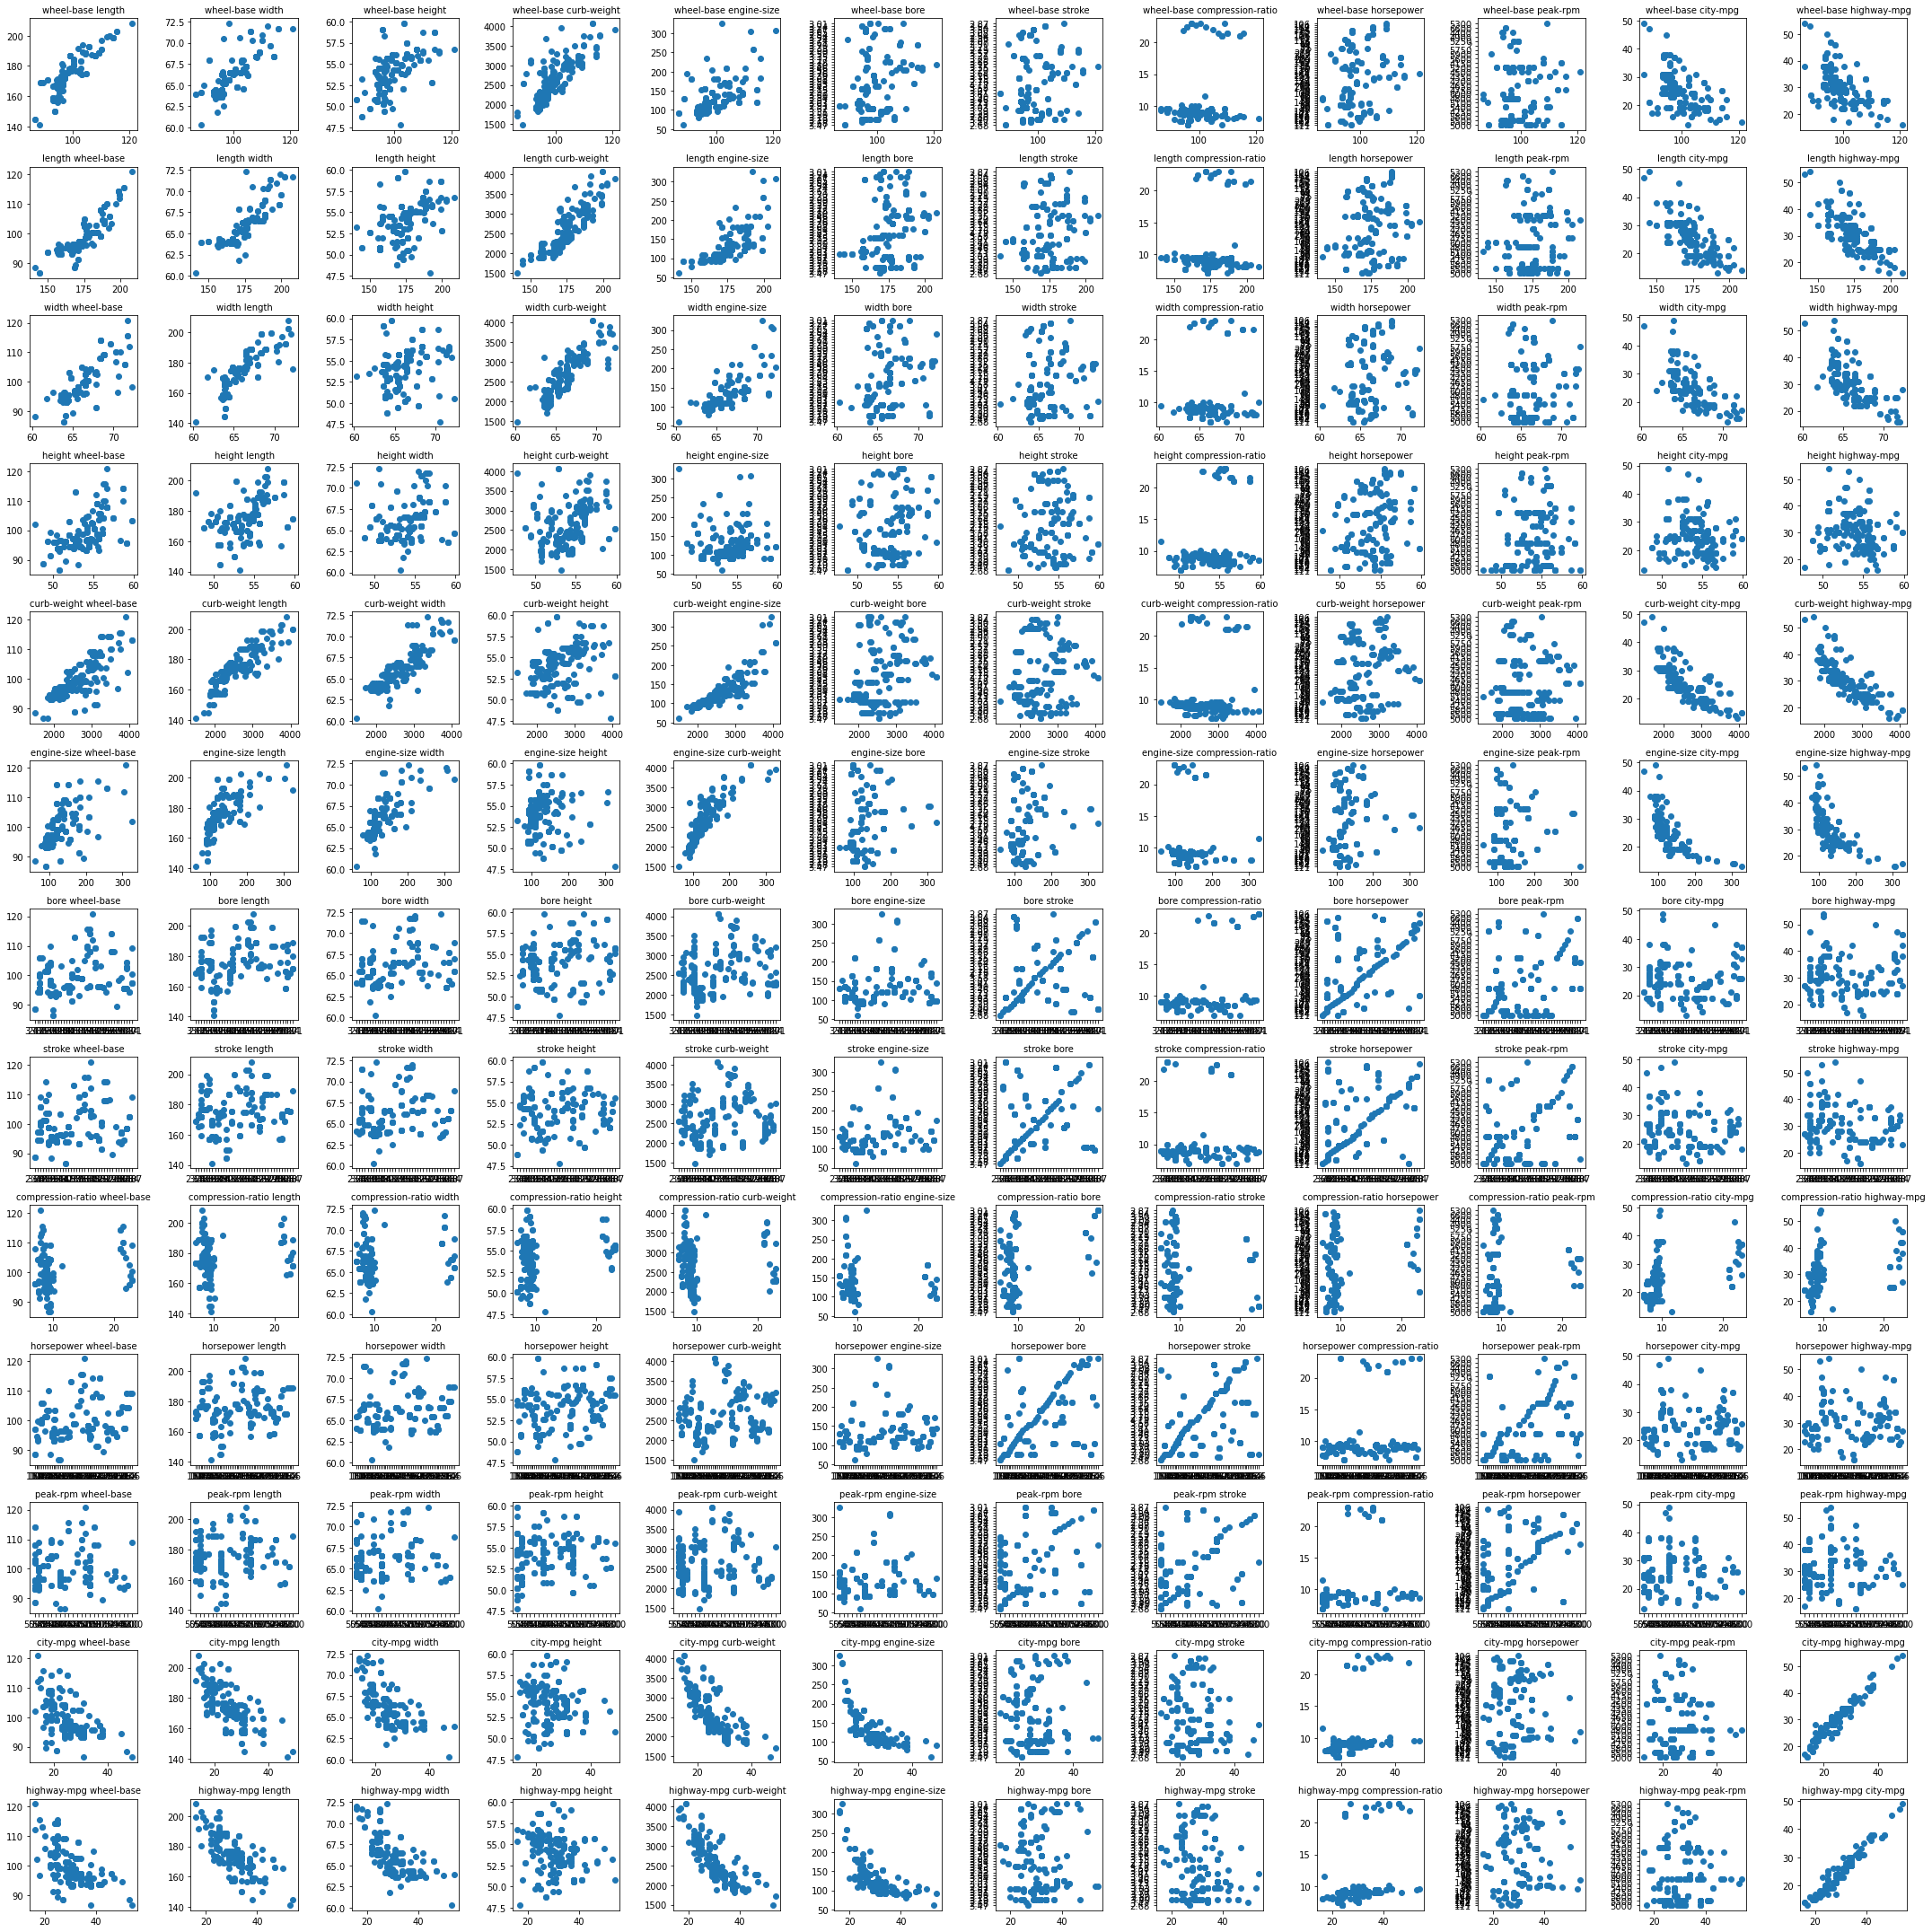

In [16]:
featurePairwiseScatterPlot(data_clear.drop(columns=data_clear.columns[-1],axis=1))

### (e)

The pairwise plot in this figure are actually contains repeat scatterplots since A-B pairwise is the same as B-A pairwise. The critical point for finding correlated features is to find the pattern from scatterplots. If one feature tend to increase and decrease together, the association is positive correlated, eitherwise, it's negative correlated. 

For linear relationship showed above, we would image to draw a bivariate normal density ellipse to summarize the correlation between the two features. The narrower the ellipse, the greater the correlation between the features. For the other relationship, we may consider to look at the "tightness" of area from the scatterplots as well. Thus the following pair seems to have very strong relationship: 
1. "bore\~stroke" pair 
2. "bore\~horsepower" pair
3. "stroke\~peak-rpm" pair
4. "horsepower\~peak-rpm" pair
5. "city-mpg\~highway-mpg" pair
6. "engine-size\~city-mpg\~highway-mpg" pair

For all other weaker but still correlated relationship analysis please see below:   "length\~wheel-base" pair are more likely to be exponentially correlated.
,   "wheel-base\~width" pair are weakly linear correlated
,   "height\~wheel-base" pair are weakly quadratically correlated
,   "wheel-base\~curb-weight" pair are more likely to be linear relationship
,   "wheel-base\~enging-size" pair are weakly linear correlated
, "wheel-base\~compression-ratio" pair are weakly linear negative correlated(have another relationship parallel on the top)
,   "length\~width" pair are weakly linear related
,   "length\~curb-weight" pair are linear related
,   "length\~engine-size" pair are weakly linear correlated
,   "width\~curb-weight" pair are weakly linear correlated
,   "width engine-size" pair are weakly linear or quadratically related
,   "height curb-weight" pair are weakly linear related
,   "curb-weight\~engine-size" pair are more likely to be linear/quadratic relationship
,   "wheel-base\~city-mpg" pair are weakly negative correlated
,   "wheel-base\~highway-mpg" pair are weakly negative correlated
,  "length\~compression-ratio" pair are linear related
,   "length\~city-mpg" pair are weakly negatively correlated
,   "length\~highway-mpg" pair are weakly negatively correlated
,   "width\~compression-ratio" pair are very weakly correlated, can be considered to be negatively correlated or no relationship
,   "curb-weight\~compression-ratio" are linear or high order 
,   "curb-weight\~city-mpg" and "curb-weight\~highway-mpg", as well as "engine-size\~city-mpg" and "engine-size\~highway-mpg" are high order or exponential correlated
,   "bore\~compression-ratio", "stroke\~compression-ratio" are horizontal line, may be slightly linear related
,   "bore\~peak-rpm" and "stroke\~peak-rpm" are somehow linear correlated.

The followings thus are less likely to be related,
thus can be used or appeared together in analysis the relationship of target:
"wheel-base\~bore" pair
   "wheel-base\~stroke" pair
 "wheel-base\~hoursepower" pair
"wheel-base\~peak-rpm" pair
  "length\~bore" pair
  "length\~stroke" pair
  "length\~height" pair
  "width\~height" pair
  "width\~bore" pair
  "width\~stroke" pair
  "height\~engine-size"
  "height\~bore" pair
  "height\~stroke" pair
  "curb-weight\~bore" pair
  "curb-weight\~stroke" pair
  "engine-size\~bore" pair
  "engine-size\~stroke" pair "length\~horsepower" pair
"length\~peak-rpm" pair "width\~horsepower" pair
 "width\~peak-rpm" pair
 "height\~peak-rpm", "height\~horsepower", "height\~highway-mpg"
 "curb-weight\~horsepower", "curb-weight\~peak-rpm"
 all of other "compression-ratio" are less likely










## PART II Regression

### (a) Model Selection
According to feature scatter plot, we consider the following features are candidates for linear regression model: wheel-base(weak), width(weak), curb-weight(weak), bore(strong), stroke(strong), horsepower(strong), peak-rpm(strong),engine-size(strong).

Among them, according to pairwise scatterplots, those pairs are correlated thus not independent, should not be selected in one linear model: (wheel-base, width), (wheel-base curb-weight),(width, curb-weight), (bore,stroke), (bore,horsepower), (stroke, horsepower), (peak-rpm, horsepower),(engine-size, wheel-base), (engine-size,width), (engine-size,curb-weight),(engine-size, bore/stroke), (engine-size,horsepower)

According to above information, we determined the following three features model to do linear regression:


1. bore, wheel-base, curb-weight
2. horsepower, wheel-base, curb-weight 
3. stroke, peak-rpm, width

Reason:
1. We start from selecting strong relationship with price: bore(quadratic), which can be considered to have quadratic relationship to price, then we cannot select pairwise correlated to bore, the left is wheel-base(linear), then we cannot select it's pairwise correlated one as well, then we choose curb-weight(linear), which has relatively strong linear relationship to price.
2. We start from selecting strong relationship with price: horsepower(quadratic), after elimiting our choices from pairwise correlated one to horsepower, we select second one as wheel-base(linear), similarily, select curb-weight(linear)
3. We start from selecting strong relationship with price: stroke(exponential), after checking out the pairwise correlated one, we choose peak-rpm(linear), and width(linear)



### Function Defination
Now we will start to define the function to do linear regression:

In [366]:
import numpy as np
from sklearn.linear_model import LinearRegression
def featureLinearRegression(featureMatrix,targetVector):
  #instantiate LinearRegression model by
  #calculate intercept b0
  #use all possible processors
  model=LinearRegression(fit_intercept=True,n_jobs=-1);
  #.fit((n,f),(n,t)), f is num of features, t is num of targets
  model.fit(featureMatrix,targetVector);
  #obtain coefficient of determination R^2
  r_sq = model.score(featureMatrix,targetVector);
  print(f"(R^2)coefficient of determination: {r_sq}");
  #obtain intercept b0
  print(f"(b0)coefficient of intercept: {model.intercept_}");
  #obtain b1
  print(f"(bn)coefficients: {model.coef_}");
  #predict function
  y_pred = model.predict(featureMatrix);
  #plot prediction as function of true price
  plt.scatter(targetVector.astype(float),y_pred)
  plt.plot(targetVector.astype(float),targetVector.astype(float),'red');
  plt.show()


### (b)
Consider bore(degree=2), wheel-base(linear), curb-weight(linear)

Consider that bore is second degree, assume bore value is x, we transform it into following style:

$$
x_{bore}+x_{bore}^2
$$

And obviously $x_{bore}^2$ will participate in linear regression as a new column of feature. 

(R^2)coefficient of determination: 0.7216859395524132
(b0)coefficient of intercept: [115507.1279036]
(bn)coefficients: [[-7.17154538e+04  1.08483996e+04 -2.22282936e+02  1.46315497e+01]]


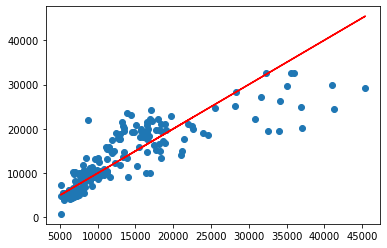

In [367]:
#transform feature bore into degree=2
featureBore_vec = data_clear[['bore']].astype(float);#Dont forget to convert to float
#add x^2 to column, now it is x+x^2
featureBore_vec['bore_sq'] = featureBore_vec.transform(lambda x: x*x);
featureMat = pd.concat([featureBore_vec,data_clear[['wheel-base','curb-weight']]],axis=1)
#get target vector
targetVec = data_clear[['price']];
#Note that here the input data format has already turn out to be 
#X=(n_samples, n_features), Y=(n_samples, n_targets)
featureLinearRegression(featureMat,targetVec)

According to model equation:

$$
Y=b_0 + b_1 x_{bore} + b_2 x_{bore}^2 + b_3 x_{wheel-base}+b_4 x_{curb-weight}
$$

We have the linear regression model after fit:
$$
Y=
115507.1279036+
\begin{bmatrix}
-71715.4538&\\
10848.3996&\\
-222.282936&\\
14.6315497
\end{bmatrix}
X
$$

And $R^2 = 0.7216859395524132$.

According to the plot above, $R^2$ is relatively accurate, the errors seems like occurred more like random error, the model predicts the result well at low price range, and worse when price raising up. 

### (c)
horsepower(degree=2), wheel-base, curb-weight


(R^2)coefficient of determination: 0.797469563495053
(b0)coefficient of intercept: [-21308.01203702]
(bn)coefficients: [[-75.4790838    0.67027924 173.63229921   6.67228489]]


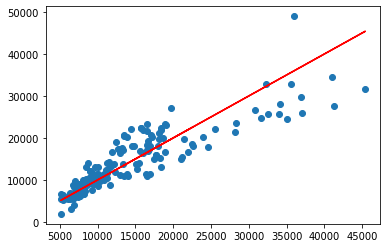

In [370]:
#transform feature bore into degree=2
featureHorsepower_vec = data_clear[['horsepower']].astype(float);#Dont forget to convert to float
#add x^2 to column, now it is x+x^2
featureHorsepower_vec['horsepower_sq'] = featureHorsepower_vec.transform(lambda x: x*x);
featureMat_2 = pd.concat([featureHorsepower_vec,data_clear[['wheel-base','curb-weight']]],axis=1)
#get target vector
targetVec = data_clear[['price']];
#Note that here the input data format has already turn out to be 
#X=(n_samples, n_features), Y=(n_samples, n_targets)
featureLinearRegression(featureMat_2,targetVec)

According to model equation:
$$
Y=b_0 + b_1 x_{horsepower} + b_2 x_{horsepower}^2 + b_3 x_{wheel-base}+b_4 x_{curb-weight}
$$

We have the linear regression model after fit:
$$
Y=
-21308.01203702+
\begin{bmatrix}
-75.4790838&\\
0.67027924&\\
173.63229921&\\
6.67228489
\end{bmatrix}
X
$$

And $R^2 = 0.797469563495053$.

According to the plot above, $R^2$ is more accurate than previous one, the errors seems like occurred more like random error, the model predicts the result well at low price range, and worse when price raising up, and it seems to have an higher order logarithmic relationship at the high price range. 

### (d)
stroke(exponential), peak-rpm, width

(R^2)coefficient of determination: 0.5837796886034781
(b0)coefficient of intercept: [-171226.16604011]
(bn)coefficients: [[-7.26055089e+03  2.48573671e+02  1.72097222e+00  2.92295614e+03]]


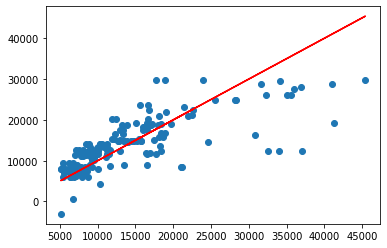

In [379]:
import numpy as np
#transform feature bore into degree=2
featureStroke_vec = data_clear[['stroke']].astype(float);#Dont forget to convert to float
#add x^2 to column, now it is x+x^2
featureStroke_vec['stroke_exp'] = featureStroke_vec.transform(lambda x: np.exp(x));
featureMat_3 = pd.concat([featureStroke_vec,data_clear[['peak-rpm','width']]],axis=1)
#get target vector
targetVec = data_clear[['price']];
#Note that here the input data format has already turn out to be 
#X=(n_samples, n_features), Y=(n_samples, n_targets)
featureLinearRegression(featureMat_3,targetVec)

According to model equation:
$$
Y=b_0 + b_1 x_{stroke} + b_2 e^{x_{stroke}} + b_3 x_{peak-rpm}+b_4 x_{width}
$$
We have the linear regression model after fit:
$$
Y=
-171226.16604011+
\begin{bmatrix}
-7260.55089&\\
248.573671 &\\
1.72097222&\\
2922.95614
\end{bmatrix}
X
$$

And $R^2 = 0.5837796886034781$.

According to the plot above, $R^2$ is relatively bad, the errors seems like occurred more like random error, the model predicts the result well at low price range, and worse when price raising up, and it seems to have an higher order logarithmic relationship at the high price range. This is the worst model among the three.

### (e)
Compare the three models:
1. model 1: $R^2=0.7216859395524132$
2. model 2: $R^2=0.797469563495053$
3. model 3: $R^2=0.5837796886034781$

I would like to choose model 2 since it got relatively higher $R^2$ and is not overfitted(according to diagram).




## PART III Coefficient and Correlation

### (a)

when it's multiple linear regression, the sample correlation is "multiple correlation coefficient", defined as square of the correlation between the response and
the fitted linear model, which is equal to the square root of $R^2$, $R^2 = cor(\hat{Y},Y)^2$. But under certain assumptions that an **intercept** must included. $R^2$ under such circumstances is defined more generally, and can also be used in nonlinear regression.

We can simply generate a proof, firstly
$$
r_{Y\hat{Y} = \frac{\sum{y_i\hat{y}_i}}{\sqrt{\sum{y_i^2}\sum{\hat{y}_i}^2}}}
$$
According to $y_i-\hat{y}_i=e_i$, replace the equation we have
$$
r_{Y\hat{Y} = \frac{\sum{(\hat{y}^2+e_i\hat{y}_i)}}{\sqrt{\sum{y_i^2}\sum{\hat{y}_i}^2}}}
$$
According to Normal Equation 
$$
(X^T_bX_b)^{-1}X_b^Ty
$$
we have $\sum{e_iX_{ij}} = 0$, thus

$$
r_{Y\hat{Y}} = \sqrt{\frac{\sum\hat{y}_i^2}{\sum y_i^2}} = \sqrt{\frac{ESS}{TSS}} = \sqrt{R^2}
$$
so
$R^2 = r^2_{Y\hat{Y}}$


### (b)
$R^2$ was defined as 

$$
R^2 = 1- \frac{SS_{res}}{SS_{tot}}
$$

Firstly, the defination is different. The correlation normally describe the linear correlationship between variables, and does not mention which two variables, but $R^2$ means the degree(or goodness) of fit of independent variable coefficients to dependent variable. So when correlation is good, the fit might still need to improve.

Secondly, Under certain circumstances, for example, the model is non-linear regression model, $SS_{res}$ can be greater than $SS_{tot}$, which means $R^2$ can be **negative**, especially when intercept or slope are constrained. Which means the best solution is worse than just no-relationship. This extra feature does not provided by $r$(or $r^2$). So when it's non-linear regression, $\rho(x,y) \neq \sqrt{R^2}$.